In [1]:
import pandas as pd
import ast
import numpy as np

In [2]:
syllable = pd.read_csv('/home/neel/Desktop/MOUS_hierarchical-representations/MOUS_IPA_SyllableFrequencies.csv')
zipf = pd.read_csv('/home/neel/Desktop/MOUS_hierarchical-representations/merged-IPA_CELEX.csv')
bigram = pd.read_csv('/home/neel/Desktop/MOUS_hierarchical-representations/mous_words_syllable_bigram_frequencies.csv')

In [3]:
bigram = bigram[['Word', 'Bigram Occurrence Counts']]
bigram['Bigram Occurrence Counts'] = bigram['Bigram Occurrence Counts'].apply(lambda s: ast.literal_eval(s.replace(",,", ",")))
bigram['Min_Bigram_Freq_Count'] = bigram['Bigram Occurrence Counts'].apply(lambda x: min(x) if x else None)
bigram['Max_Bigram_Freq_Count'] = bigram['Bigram Occurrence Counts'].apply(lambda x: max(x) if x else None)
bigram['Lg10_Max_Bigram_Freq_Count'] = bigram['Max_Bigram_Freq_Count'].apply(lambda x: np.log10(x) if x else None)
bigram['Mean_Bigram_Freq_Count'] = bigram['Bigram Occurrence Counts'].apply(lambda x: np.mean(x) if x else None)
bigram['Lg10_Mean_Bigram_Freq_Count'] = bigram['Mean_Bigram_Freq_Count'].apply(lambda x: np.log10(x) if x else None)
bigram['Lg10_Min_Bigram_Freq_Count'] = bigram['Min_Bigram_Freq_Count'].apply(lambda x: np.log10(x) if x else None)
bigram

,Word,Bigram Occurrence Counts,Min_Bigram_Freq_Count,Max_Bigram_Freq_Count,Lg10_Max_Bigram_Freq_Count,Mean_Bigram_Freq_Count,Lg10_Mean_Bigram_Freq_Count,Lg10_Min_Bigram_Freq_Count
0,toen,"[2236591.0, 837795.0, 8542439.0]",837795.0,8542439.0,6.931582,3.872275e+06,6.587966,5.923138
1,de,[2559661.0],2559661.0,2559661.0,6.408182,2.559661e+06,6.408182,6.408182
2,barkeeper,"[584273.0, 1754491.0, 2174749.0, 3143026.0, 94...",189025.0,6799370.0,6.832469,2.081522e+06,6.318381,5.276519
3,die,"[1050254.0, 2076673.0]",1050254.0,2076673.0,6.317368,1.563464e+06,6.194088,6.021294
4,irritante,"[2884214.0, 200692.0, 1787712.0, 333345.0, 892...",200692.0,4143386.0,6.617355,1.905164e+06,6.279932,5.302530
...,...,...,...,...,...,...,...,...
1937,blije,"[152155.0, 3369152.0, 1639122.0, 913788.0]",152155.0,3369152.0,6.527521,1.518554e+06,6.181430,5.182286
1938,jongeren,"[866375.0, 2451854.0, 2927082.0, 3692145.0, 67...",866375.0,8542439.0,6.931582,3.841034e+06,6.584448,5.937706
1939,intens,"[2264626.0, 1477178.0, 3522714.0, 8542439.0, 6...",612425.0,8542439.0,6.931582,3.283876e+06,6.516387,5.787053
1940,plezier,"[97171.0, 4397946.0, 100963.0, 123482.0, 20766...",97171.0,6799370.0,6.832469,2.265934e+06,6.355247,4.987537


In [4]:
syllable = syllable[['Word', 'Min_Freq_Count', 'Max_Freq_Count', 'Mean_Freq_Count']]
#rename Min_Freq_Count, Max_Freq_Count, Mean_Freq_Count to Min_Syllable_Freq_Count, Max_Syllable_Freq_Count, Mean_Syllable_Freq_Count
syllable = syllable.rename(columns={'Min_Freq_Count': 'Min_Syllable_Freq_Count', 'Max_Freq_Count': 'Max_Syllable_Freq_Count', 'Mean_Freq_Count': 'Mean_Syllable_Freq_Count'})
syllable['Lg10 Min_Syllable_Freq_Count'] = syllable['Min_Syllable_Freq_Count'].apply(lambda x: np.log10(x) if x else None)
syllable['Lg10 Max_Syllable_Freq_Count'] = syllable['Max_Syllable_Freq_Count'].apply(lambda x: np.log10(x) if x else None)
syllable['Lg10 Mean_Syllable_Freq_Count'] = syllable['Mean_Syllable_Freq_Count'].apply(lambda x: np.log10(x) if x else None)

syllable

,Word,Min_Syllable_Freq_Count,Max_Syllable_Freq_Count,Mean_Syllable_Freq_Count,Lg10 Min_Syllable_Freq_Count,Lg10 Max_Syllable_Freq_Count,Lg10 Mean_Syllable_Freq_Count
0,toen,177,177,177.000000,2.247973,2.247973,2.247973
1,die,441857,441857,441857.000000,5.645282,5.645282,5.645282
2,de,195887,195887,195887.000000,5.292006,5.292006,5.292006
3,barkeeper,5468,6764,5910.000000,3.737829,3.830204,3.771587
4,irritante,1105,173653,74492.500000,3.043362,5.239682,4.872113
...,...,...,...,...,...,...,...
1937,betalen,7556,29153,19233.000000,3.878292,4.464683,4.284047
1938,intens,575,655575,328075.000000,2.759668,5.816622,5.515973
1939,jongeren,932,2276250,858348.666667,2.969416,6.357220,5.933664
1940,plezier,6109,14759,10434.000000,3.785970,4.169057,4.018451


In [5]:
zipf = zipf[['Word', 'Zipf']]
zipf

,Word,Zipf
0,ik,7.597064
1,je,7.559864
2,het,7.384235
3,de,7.381291
4,dat,7.340221
...,...,...
47642,aanbidster,1.656532
47643,aanbesteden,1.656532
47644,aanbelanden,1.656532
47645,aanbaksel,1.656532


In [6]:
# Merge the dataframes
df = pd.merge(syllable, bigram, on='Word', how='inner')
df = pd.merge(df, zipf, on='Word', how='inner')

In [7]:
df = df.drop(columns=['Bigram Occurrence Counts'])
#sort df columns. Word, Min_Syllable_Freq_Count, Max_Syllable_Freq_Count, Mean_Syllable_Freq_Count, Lg10 Min_Syllable_Freq_Count, Lg10 Max_Syllable_Freq_Count, Lg10 Mean_Syllable_Freq_Count, Min_Bigram_Freq_Count, Max_Bigram_Freq_Count, Mean_Bigram_Freq_Count, Lg10_Min_Bigram_Freq_Count, Lg10_Max_Bigram_Freq_Count, Lg10_Mean_Bigram_Freq_Count, Zipf
df = df[['Word', 'Min_Syllable_Freq_Count', 'Max_Syllable_Freq_Count', 'Mean_Syllable_Freq_Count', 'Lg10 Min_Syllable_Freq_Count', 'Lg10 Max_Syllable_Freq_Count', 'Lg10 Mean_Syllable_Freq_Count', 'Min_Bigram_Freq_Count', 'Max_Bigram_Freq_Count', 'Mean_Bigram_Freq_Count', 'Lg10_Min_Bigram_Freq_Count', 'Lg10_Max_Bigram_Freq_Count', 'Lg10_Mean_Bigram_Freq_Count', 'Zipf']]
df

,Word,Min_Syllable_Freq_Count,Max_Syllable_Freq_Count,Mean_Syllable_Freq_Count,Lg10 Min_Syllable_Freq_Count,Lg10 Max_Syllable_Freq_Count,Lg10 Mean_Syllable_Freq_Count,Min_Bigram_Freq_Count,Max_Bigram_Freq_Count,Mean_Bigram_Freq_Count,Lg10_Min_Bigram_Freq_Count,Lg10_Max_Bigram_Freq_Count,Lg10_Mean_Bigram_Freq_Count,Zipf
0,toen,177,177,177.000000,2.247973,2.247973,2.247973,837795.0,8542439.0,3.872275e+06,5.923138,6.931582,6.587966,6.032333
1,die,441857,441857,441857.000000,5.645282,5.645282,5.645282,1050254.0,2076673.0,1.563464e+06,6.021294,6.317368,6.194088,6.853871
2,de,195887,195887,195887.000000,5.292006,5.292006,5.292006,2559661.0,2559661.0,2.559661e+06,6.408182,6.408182,6.408182,7.381291
3,barkeeper,5468,6764,5910.000000,3.737829,3.830204,3.771587,189025.0,6799370.0,2.081522e+06,5.276519,6.832469,6.318381,3.622674
4,bediende,20416,195887,79097.666667,4.309971,5.292006,4.898164,636500.0,8542439.0,2.840802e+06,5.803798,6.931582,6.453441,4.043922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,drogist,3,4040,2021.500000,0.477121,3.606381,3.305674,285914.0,3439538.0,1.434174e+06,5.456235,6.536500,6.156602,3.027600
1170,betalen,7556,29153,19233.000000,3.878292,4.464683,4.284047,892070.0,8542439.0,3.419944e+06,5.950399,6.931582,6.534019,5.206761
1171,intens,575,655575,328075.000000,2.759668,5.816622,5.515973,612425.0,8542439.0,3.283876e+06,5.787053,6.931582,6.516387,3.778748
1172,plezier,6109,14759,10434.000000,3.785970,4.169057,4.018451,97171.0,6799370.0,2.265934e+06,4.987537,6.832469,6.355247,5.093966


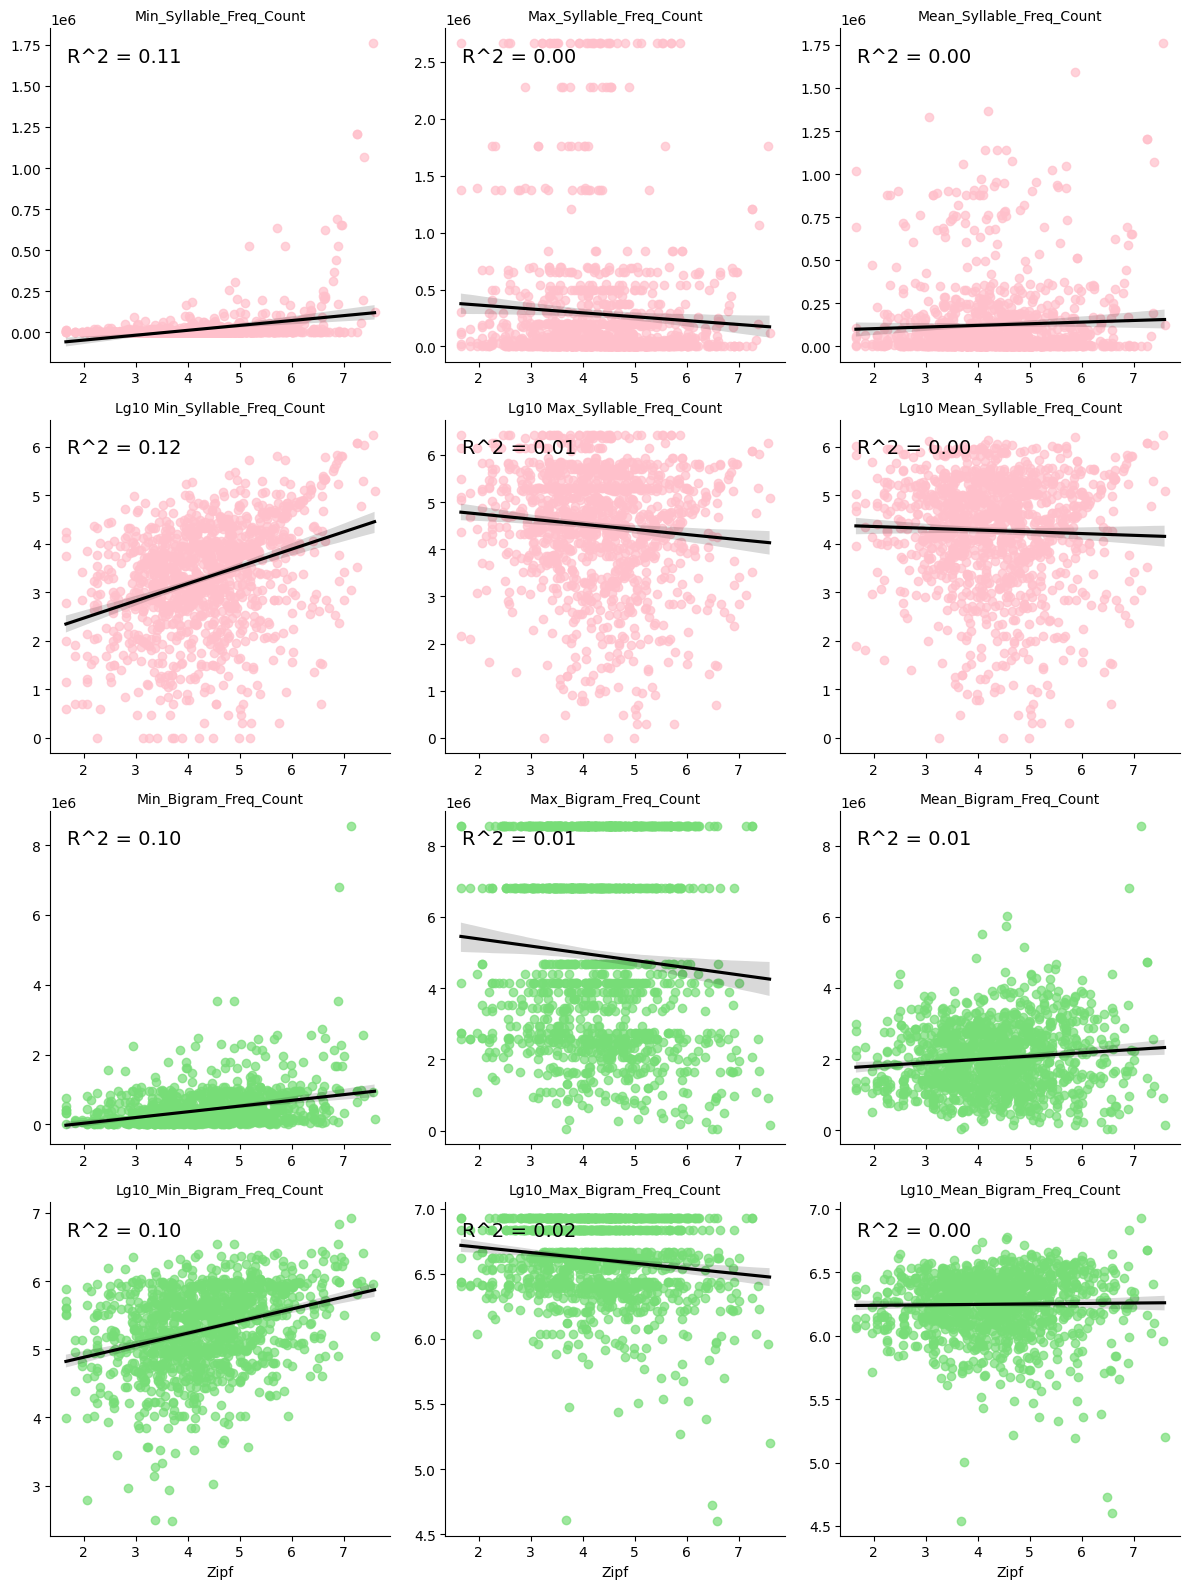

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Suppose df is your DataFrame, with columns including ['Zipf', 'Word', ...features...]
# We'll "melt" all other features into a long format
df_melt = df.melt(id_vars=['Zipf', 'Word'], var_name='feature', value_name='value')

# 1. Drop NaN or infinite values to avoid Pearson correlation errors
df_melt = df_melt.dropna(subset=['Zipf', 'value'])
df_melt = df_melt[np.isfinite(df_melt['Zipf']) & np.isfinite(df_melt['value'])]

# Define a function that will handle coloring by feature and plotting with regression
def custom_regplot_with_r2(data, **kwargs):
    # Identify which feature we're plotting
    feature = data['feature'].iloc[0]
    
    # 2. Pick scatter color based on feature name
    if 'Syl' in feature or 'Syllable' in feature:
        point_color = 'pink'
    elif 'BG' in feature or 'Bigram' in feature:
        point_color = '#77dd77'
    else:
        point_color = 'gray'  # or another default color
    
    # 3. Safely compute correlation if there's more than one data point
    if len(data) > 1:
        r, _ = stats.pearsonr(data['Zipf'], data['value'])
        r2 = r**2
    else:
        r2 = 0.0
    
    # 4. Plot scatter + regression line with separate colors
    sns.regplot(
        x='Zipf',
        y='value',
        data=data,
        scatter_kws={'color': point_color, 'alpha': 0.7},
        line_kws={'color': 'black'},  # Use black (or another color) for trendline
        **kwargs
    )

    # 5. Annotate R^2 in the upper-left corner of each subplot
    plt.text(
        0.05, 0.9, f'R^2 = {r2:.2f}',
        transform=plt.gca().transAxes,
        fontsize=14
    )

# 6. Create a FacetGrid (tile layout)
g = sns.FacetGrid(
    df_melt, 
    col='feature',
    col_wrap=3,  # number of subplots per row
    height=4,
    sharex=False,
    sharey=False
)

# 7. Map our custom plotting function to the FacetGrid
g.map_dataframe(custom_regplot_with_r2)

# 8. Set axis labels, titles, and tighten layout
g.set_axis_labels('Zipf', '')
g.set_titles(col_template='{col_name}')
plt.tight_layout()
plt.show()